In [54]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [56]:
# Establish connection
conn = mysql.connector.connect(
    host="localhost",       # Host name
    user="root",   # Mysql user name
    password="*****", # SQL password
    database="Explore_Secure_TravelInsurance" # Database name 
)


In [58]:
# Create cursor object
cursor = conn.cursor()

# Execute a query
cursor.execute("SHOW TABLES;")


# Fetch and display results
tables = cursor.fetchall()
print("Tables in the database:", tables)



Tables in the database: [('Agent',), ('AgentSales',), ('Claim',), ('ClaimProcessing',), ('CountryOffers',), ('Customer',), ('CustomerPolicy',), ('HighRiskCoverage',), ('InsurancePolicy',), ('Partnership',), ('Payment',), ('PersonalizedQuote',), ('PolicyType',), ('TravelPlatform',)]


In [60]:
cursor.execute("SELECT * FROM `Customer`;")
print(cursor.fetchall())


[(1, 'Alice Johnson', 'Female', datetime.date(1985, 6, 15), 'Engineer', 'Business', 'Medium'), (2, 'Bob Smith', 'Male', datetime.date(1990, 9, 23), 'Doctor', 'Medical', 'High'), (3, 'Charlie Brown', 'Male', datetime.date(1987, 3, 10), 'Professor', 'Education', 'Low'), (4, 'Diana Prince', 'Female', datetime.date(1995, 12, 5), 'Journalist', 'Business', 'Medium'), (5, 'Evan Rogers', 'Male', datetime.date(1980, 7, 18), 'Athlete', 'Leisure', 'High'), (6, 'Fiona Davis', 'Female', datetime.date(1992, 11, 30), 'Blogger', 'Leisure', 'Low'), (7, 'George Miller', 'Male', datetime.date(1983, 4, 25), 'Lawyer', 'Business', 'Medium'), (8, 'Helen Carter', 'Female', datetime.date(1975, 5, 22), 'Retired', 'Leisure', 'Low'), (9, 'Ian Thompson', 'Male', datetime.date(1999, 8, 14), 'Student', 'Education', 'Medium'), (10, 'Jessica Lee', 'Female', datetime.date(1988, 2, 17), 'Entrepreneur', 'Business', 'High'), (11, 'Kevin Malone', 'Male', datetime.date(1982, 11, 2), 'Accountant', 'Business', 'Low'), (12, 'A

In [62]:
cursor = conn.cursor()

# Fetch all table names
cursor.execute("SHOW TABLES;")
tables = [table[0] for table in cursor.fetchall()]

# Iterate over each table and fetch data
for table in tables:
    print(f"\nFetching data from table: {table}")
    
    try:
        query = f"SELECT * FROM `{table}`;"  # Use backticks for safety
        cursor.execute(query)
        
        # Get column names
        columns = [desc[0] for desc in cursor.description]

        # Fetch data
        rows = cursor.fetchall()

        # Convert to Pandas DataFrame
        df = pd.DataFrame(rows, columns=columns)

        # Display first 5 rows
        print(df.head())  
    except Exception as e:
        print(f"Error fetching data from {table}: {e}")


Fetching data from table: Agent
   agent_id            name           contact_info
0         1   Michael Scott  michael@insurance.com
1         2      Pam Beesly      pam@insurance.com
2         3     Jim Halpert      jim@insurance.com
3         4  Dwight Schrute   dwight@insurance.com
4         5  Stanley Hudson  stanley@insurance.com

Fetching data from table: AgentSales
   agent_id  policy_id   sale_date commission
0         1        101  2025-01-05      50.00
1         2        102  2025-01-10      75.00
2         3        103  2025-02-01      30.00
3         4        104  2025-02-15      20.00
4         5        105  2025-03-01      90.00

Fetching data from table: Claim
   claim_id  customer_id  policy_id claim_status claim_amount submission_date
0         1            1        101      Pending      5000.00      2025-02-20
1         2            2        103     Approved      1500.00      2025-02-25
2         3            3        104     Rejected       800.00      2025-03-01
3 

/var/folders/34/jqpjg_x508j0x978h6stq2j80000gn/T/ipykernel_5177/154940699.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_claim, x='claim_status', palette='Set2')


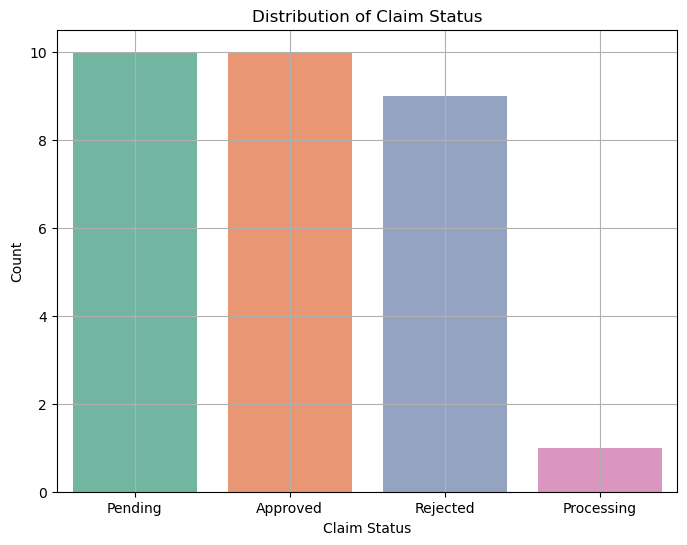

In [64]:
# Fetching the data from claim table create a plot to see the claim status of each one from the data.
# Fetch data from the Claim table
query = "SELECT * FROM Claim;"
cursor.execute(query)

# Get column names
columns = [desc[0] for desc in cursor.description]

# Fetch data
rows = cursor.fetchall()

# Convert to Pandas DataFrame
df_claim = pd.DataFrame(rows, columns=columns)
# Plotting the claim status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_claim, x='claim_status', palette='Set2')
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()


/var/folders/34/jqpjg_x508j0x978h6stq2j80000gn/T/ipykernel_5177/2443226331.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_country_offers, x='country_name', y='discount', palette='Blues')


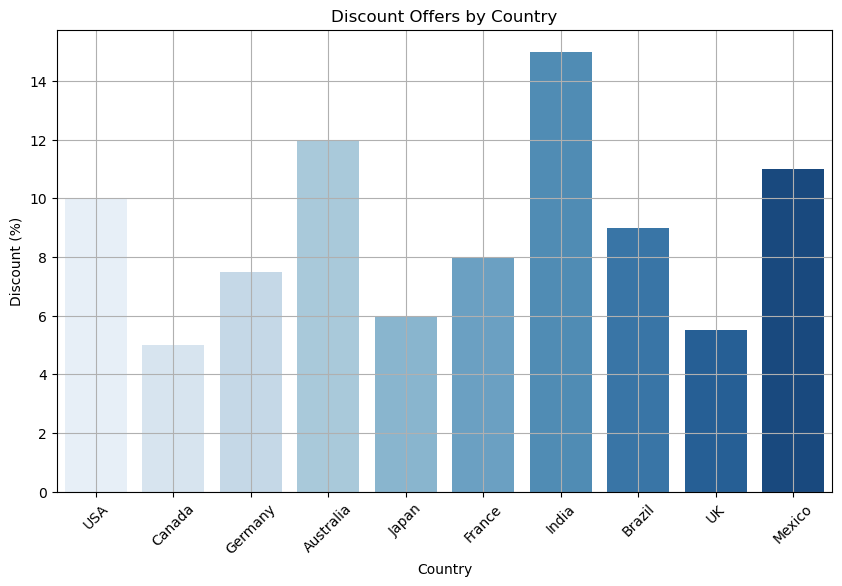

In [70]:
#Fetching from country tables data to see countires which offers discounts.
# Fetch data from the CountryOffers table
query = "SELECT * FROM CountryOffers;"
cursor.execute(query)

# Get column names
columns = [desc[0] for desc in cursor.description]

# Fetch data
rows = cursor.fetchall()

# Convert to Pandas DataFrame
df_country_offers = pd.DataFrame(rows, columns=columns)

# Plot the distribution of discounts by country
plt.figure(figsize=(10, 6))
sns.barplot(data=df_country_offers, x='country_name', y='discount', palette='Blues')
plt.title('Discount Offers by Country')
plt.xlabel('Country')
plt.ylabel('Discount (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/34/jqpjg_x508j0x978h6stq2j80000gn/T/ipykernel_5177/779888698.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_payment_policy, x='policy_name', y='amount', palette='viridis')


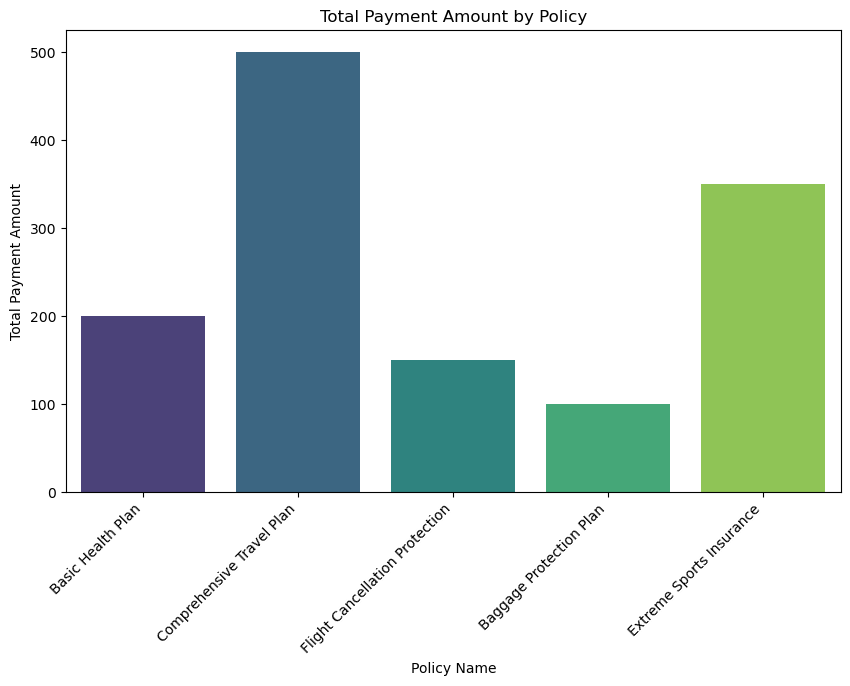

In [76]:
#Sum of amount customers paid for each policy .
cursor = conn.cursor()

# Fetch data from the Payment table
cursor.execute("SELECT * FROM Payment;")
columns = [desc[0] for desc in cursor.description]
rows = cursor.fetchall()
df_payment = pd.DataFrame(rows, columns=columns)

# Fetch data from the InsurancePolicy table
cursor.execute("SELECT * FROM InsurancePolicy;")
columns = [desc[0] for desc in cursor.description]
rows = cursor.fetchall()
df_insurance_policy = pd.DataFrame(rows, columns=columns)

# Group payments by policy_id and sum the amounts
df_payment_policy = df_payment.groupby('policy_id')['amount'].sum().reset_index()

# Merge payment data with insurance policy data to get policy names
df_payment_policy = pd.merge(df_payment_policy, df_insurance_policy, on='policy_id', how='inner')

# Plot total payment amount by policy
plt.figure(figsize=(10, 6))
sns.barplot(data=df_payment_policy, x='policy_name', y='amount', palette='viridis')
plt.title('Total Payment Amount by Policy')
plt.xlabel('Policy Name')
plt.ylabel('Total Payment Amount')
plt.xticks(rotation=45, ha='right')
plt.show()
